# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">TRAIN MODEL SVC</div>

Conda env: `artofproblemsolving`

In [7]:
# Import library needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from time import perf_counter
from utils.util import save_pkl
from utils.util import create_folder
from utils.utils_for_classification import load_text_dataset_from_directory
from utils.utils_for_classification import classification_evaluation
from utils.utils_for_classification import LABELS, LABELS_INDICES, LABELS_DICT

from sklearn.metrics import log_loss
from tensorflow import constant, reduce_mean
from tensorflow.keras.losses import sparse_categorical_crossentropy


Load & prepare dataset

In [8]:
X_train, y_train = load_text_dataset_from_directory(r"..\data\classification\train")
X_test, y_test = load_text_dataset_from_directory(r"..\data\classification\test")
y_train_indices, y_test_indices = [LABELS_DICT[label] for label in y_train], [LABELS_DICT[label] for label in y_test]

# Preprocess text data (Representation text to numeric)
lower_case = False
start = perf_counter()
vectorizer = TfidfVectorizer(lowercase=lower_case)
vectorizer.fit(X_train)

vectorized_X_train = vectorizer.transform(X_train)
vectorized_X_test = vectorizer.transform(X_test)


Found 4 labels in "..\data\classification\train"
 - Label "Algebra" 623 files
 - Label "Combinatorics" 568 files
 - Label "Geometry" 708 files
 - Label "Number Theory" 625 files
Total 2524 files
Found 4 labels in "..\data\classification\test"
 - Label "Algebra" 174 files
 - Label "Combinatorics" 158 files
 - Label "Geometry" 197 files
 - Label "Number Theory" 174 files
Total 703 files


Train

In [9]:
model = SVC(kernel='linear', C=1.0, probability=True)
model.fit(vectorized_X_train, y_train)
end = perf_counter()
training_time = end - start
print(f"Training time: {training_time:.2f}s")

y_pred = model.predict(vectorized_X_test)
y_pred_proba = model.predict_proba(vectorized_X_test)


Training time: 5.07s


               precision    recall  f1-score   support

      Algebra     0.8690    0.8391    0.8538       174
Combinatorics     0.7965    0.8671    0.8303       158
     Geometry     0.9735    0.9340    0.9534       197
Number Theory     0.8563    0.8563    0.8563       174

     accuracy                         0.8762       703
    macro avg     0.8739    0.8741    0.8734       703
 weighted avg     0.8789    0.8762    0.8770       703

loss (sklearn)   : 3.7135772396658644
loss (tensorflow): 3.6284556515542365


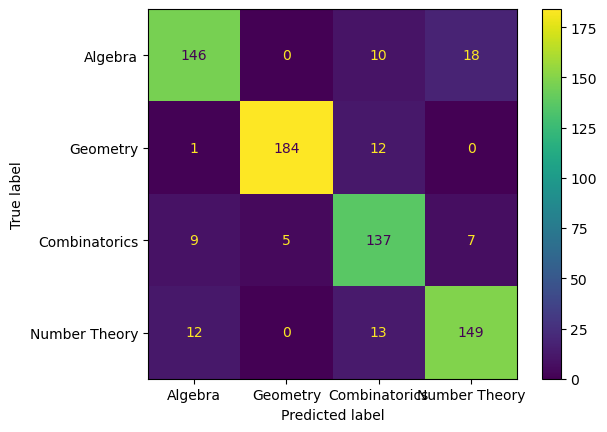

In [10]:
# Evaluate model performance
heatmap, report = classification_evaluation(y_test, y_pred)
loss_sklearn = log_loss(y_true=y_test_indices, y_pred=y_pred_proba)
loss_tensorflow = reduce_mean(sparse_categorical_crossentropy(y_true=y_test_indices, y_pred=y_pred_proba)).numpy()

print(f"loss (sklearn)   : {loss_sklearn}")
print(f"loss (tensorflow): {loss_tensorflow}")
heatmap.plot(); plt.show()

In [11]:
print(f'xx,classification,SupportVectorClassification,{lower_case},-,-,-,-,tf.keras.losses.sparse_categorical_crossentropy,{loss_tensorflow},{report["accuracy"]},{report["weighted avg"]["precision"]},{report["weighted avg"]["recall"]},{report["weighted avg"]["f1-score"]},{training_time}')


xx,classification,SupportVectorClassification,False,-,-,-,-,tf.keras.losses.sparse_categorical_crossentropy,3.6284556515542365,0.8762446657183499,0.8788783537865545,0.8762446657183499,0.8770451689889636,5.074384299999991


Save model

In [12]:
# Save model
directory = "saved_models/classification/SupportVectorMechine"
create_folder(directory)
save_pkl(model, f"{directory}/model.pkl")
save_pkl(vectorizer, f"{directory}/vectorizer.pkl")


Already exist --> 'saved_models/classification/SupportVectorMechine' NOT CREATED
Saved: "saved_models/classification/SupportVectorMechine/model.pkl"
Saved: "saved_models/classification/SupportVectorMechine/vectorizer.pkl"
